# Self-Organizing Maps

Self-Organizing Maps (SOMs) serve as a type of unsupervised neural network, focusing on reducing the complexity of high-dimensional data and facilitating its visualization. These maps are trained through a competitive learning mechanism, where nodes (also known as neurons) in the network compete to represent input data. Structurally, SOMs are composed of a grid of nodes, typically arranged in a two-dimensional layout. Each node is associated with a weight vector that signifies a point in the input space. The organization of nodes ensures that similar input data points are positioned near each other within the SOM.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import umap
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import the custom functions
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from functions_algorithms import *

In [2]:
# Import the dataset
customer_info_final = pd.read_csv('../../custumer_info_final_with_%.csv')

In [3]:
# Check the dataset
customer_info_final.head()

,Unnamed: 0,customer_age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,percentage_lifetime_spend_fish,percentage_lifetime_spend_vegetables,percentage_lifetime_spend_nonalcohol_drinks,percentage_lifetime_spend_alcohol_drinks,percentage_lifetime_spend_meat,percentage_lifetime_spend_hygiene,percentage_lifetime_spend_videogames,percentage_lifetime_spend_petfood,avg_spend_per_store,loyalty_years
0,0,60,1.0,1.0,1.0,2.0,18306.0,7106.0,17.0,484.0,...,0.095753,0.011426,0.014259,0.022262,0.052551,0.051323,0.093156,0.059350,21179.500000,14.0
1,1,55,0.0,1.0,1.0,3.0,3097.0,4073.0,10.0,301.0,...,0.132786,0.017030,0.048204,0.097935,0.025233,0.073890,0.085092,0.114173,5891.666667,15.0
2,2,83,0.0,0.0,0.0,1.0,10825.0,207.0,17.0,153.0,...,0.009367,0.009491,0.015632,0.003722,0.017679,0.003288,0.000000,0.256498,16121.000000,17.0
3,3,23,0.0,0.0,0.0,1.0,697.0,570.0,14.8,8.0,...,0.032818,0.001526,0.006297,0.540546,0.010303,0.112002,0.042549,0.012211,5241.000000,0.0
4,4,65,1.0,1.0,0.0,2.0,13419.0,12029.0,18.0,439.8,...,0.104672,0.010350,0.017532,0.031133,0.034334,0.033063,0.101989,0.068079,21247.400000,19.0


In [4]:
# Drop the first column
customer_info_final.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Scale the data using StandardScaler
customer_info_scaled = StandardScaler().fit_transform(customer_info_final)

In [6]:
# Check the shape of the dataset
customer_info_final.shape

(39645, 32)

In [27]:
# Create a SOM with a 20 by 20 grid, using 32 features
som = MiniSom(
    20,
    20,
    32,
    sigma=0.8,
    learning_rate=1,
    neighborhood_function='gaussian',
    random_seed=42
    )

In [8]:
# Set the seed of Numpy (to allow replication)
np.random.seed(42)

num_iterations = 1000

# Initialize an empty list to store quantization errors
q_errors = []
# Loop over the range from 1 to num_iterations
for i in range(1, num_iterations):
    # Train SOM with the current batch size 'i'
    som.train_batch(customer_info_scaled, i)
    # Append the quantization error to the list
    q_errors.append(som.quantization_error(customer_info_scaled))

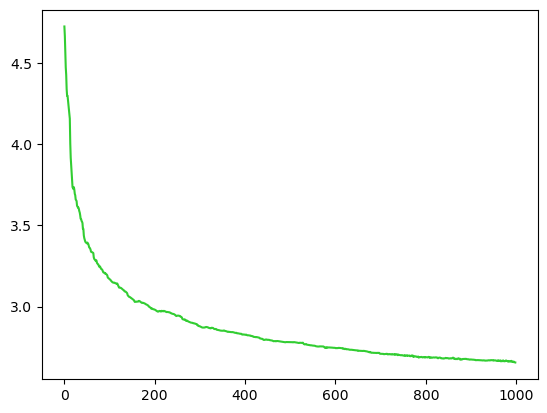

In [9]:
# Plot a graph to visualize the quantization errors
plt.plot(q_errors, color='limegreen')

In [10]:
# Set up the same SOM and retrain it
som = MiniSom(
    20, 20, 32, sigma=0.8,
    learning_rate=1, neighborhood_function='gaussian', random_seed=42)
som.train(customer_info_scaled, 1000)

In [11]:
# Check the winner node
som.winner(customer_info_scaled[0])

(5, 13)

In [12]:
# Assign the winning node for each row in customer_info_scaled using SOM
customer_info_final['winner_node'] = (
    [som.winner(customer_info_scaled[i]) for i in range(0, len(customer_info_scaled))])

In [14]:
# Group the data by the winner_node columnc calculate the size of each group, and sort the results in ascending order
customer_info_final.groupby('winner_node').size().sort_values()

winner_node
(19, 18)      1
(2, 16)       1
(2, 19)       1
(11, 0)       1
(10, 7)       1
           ... 
(16, 1)     636
(0, 0)      657
(2, 0)      658
(17, 0)     719
(15, 1)     855
Length: 282, dtype: int64

The neurons with the most data points associated are neurons: 
- (16,1)
- (0,0)
- (2,0)
- (17,0)
- (15,1)

In [16]:
# Extract unique values from the 'distinct_stores_visited' column in customer_info_final
stores_visited = list(customer_info_final.distinct_stores_visited.unique())
# Create a dictionary to assign unique colors to each store
stores_color = {store: 'C'+str(i+1) for i, store in enumerate(stores_visited)}

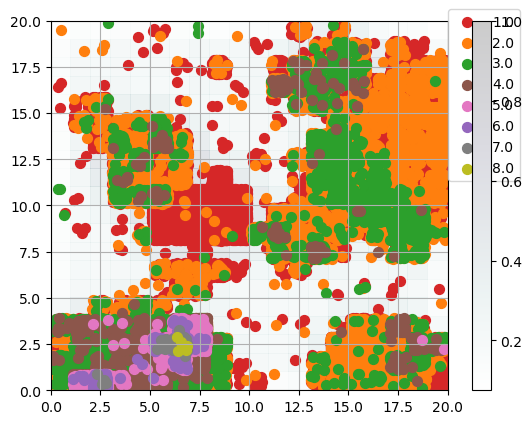

In [19]:
# Visualize the individual points in the grid
visualize_data_points_grid(
    customer_info_final, customer_info_scaled, som, 'distinct_stores_visited',stores_color)